# **KELOMPOK 8**

Nama Anggota:

Dawam Ilhami Assidiqi (2041720181 / 03)

Iftitah Hidayati (2041720006 / 11)

Safira istifarini (2041720229 / 17)

Masalah : Banjir menjadi bencana yang sering terjadi

Sebab : Masyarakat yang berada di daerah jauh dari tepi jalan susah mengakses TPS

Akibat : masyarakat membuang sampah di sungai sehingga menjadi penyebab banjir sering terjadi di Indonesia

Solusi : membantu memprediksi fluktuasi sampah yang menjadi penyebab banjir

In [ ]:
# import package
import numpy as np
import pandas as pd

In [37]:
# baca data
data = pd.read_csv('data tubes.csv')
data.head()

,nama_kabupaten_kota,tahun,jumlah_produksi_sampah_per_tahun,"Terjadi Banjir (1=Ya, 0=Tidak)",jumlah_banjir
0,Kabupaten Pacitan,2017,1511,1,21
1,Kabupaten Ponorogo,2017,419,1,10
2,Kabupaten Trenggalek,2017,100,0,0
3,Kabupaten Tulungagung,2017,1895,1,17
4,Kabupaten Blitar,2017,464,1,7


In [38]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nama_kabupaten_kota               190 non-null    object
 1   tahun                             190 non-null    int64 
 2   jumlah_produksi_sampah_per_tahun  190 non-null    int64 
 3   Terjadi Banjir (1=Ya, 0=Tidak)    190 non-null    int64 
 4   jumlah_banjir                     190 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.5+ KB


,tahun,jumlah_produksi_sampah_per_tahun,"Terjadi Banjir (1=Ya, 0=Tidak)",jumlah_banjir
count,190.00000,190.000000,190.000000,190.000000
mean,2019.00000,701.894737,0.468421,6.357895
std,1.41795,717.318352,0.500320,8.267250
min,2017.00000,100.000000,0.000000,0.000000
25%,2018.00000,186.750000,0.000000,0.000000
50%,2019.00000,294.000000,0.000000,0.000000
75%,2020.00000,1213.750000,1.000000,11.750000
max,2021.00000,2384.000000,1.000000,29.000000


In [39]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\SAFIRA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


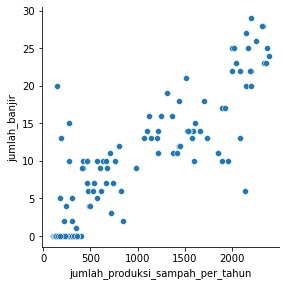

In [40]:
# operasi visualisasi
sns.pairplot(data, x_vars=['jumlah_produksi_sampah_per_tahun'], 
             y_vars='jumlah_banjir', size=4, aspect=1, kind='scatter')
plt.show()

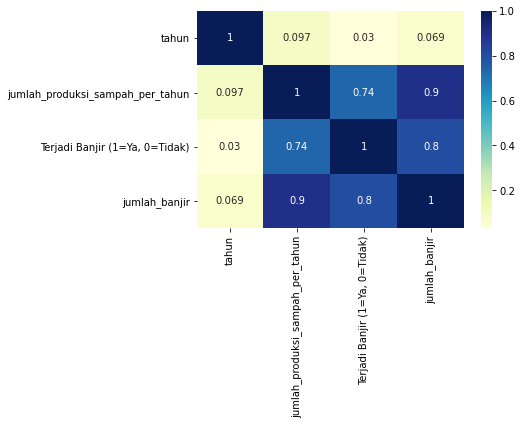

In [41]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Regresi Linier

In [42]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['jumlah_produksi_sampah_per_tahun']
y = data['jumlah_banjir']

In [43]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [44]:
# hasil training dtaset
X_train
y_train

165    19
65      0
74      0
89      0
81      0
       ..
87     10
103     0
67      0
24      0
8      10
Name: jumlah_banjir, Length: 133, dtype: int64

In [45]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [46]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const                              -0.787503
jumlah_produksi_sampah_per_tahun    0.010484
dtype: float64

In [47]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          jumlah_banjir   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     494.9
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           2.53e-46
Time:                        07:14:35   Log-Likelihood:                -362.23
No. Observations:                 133   AIC:                             728.5
Df Residuals:                     131   BIC:                             734.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.7875      0.446     -1.764      0.080      -1.671       0.096
jumlah_produksi_sampah_per_tahun     0.0105      0.000     22.246      0.000       0.010       0.011
==============================================================================
Omnibus:                       61.461   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.590
Skew:                           1.603   Prob(JB):                     2.88e-59
Kurtosis:                       9.195   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

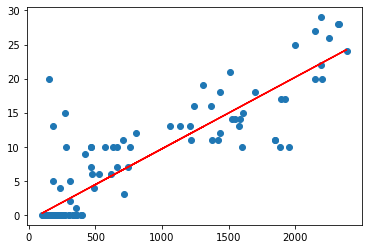

In [48]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, -0.7875 + 0.0105*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [49]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\SAFIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


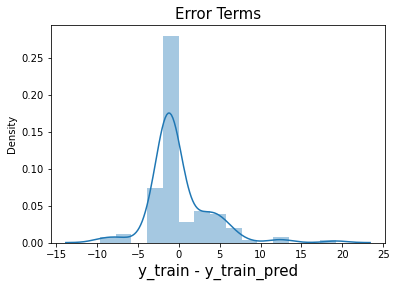

In [50]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

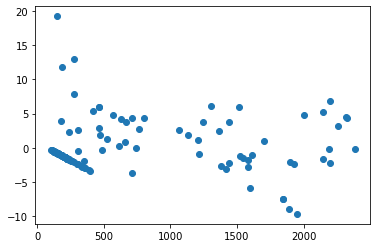

In [51]:
plt.scatter(X_train,res)
plt.show()

In [52]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

161    1.529351
77     1.445483
11     0.900340
158    1.959174
164    0.858406
dtype: float64

In [53]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8512563266808445

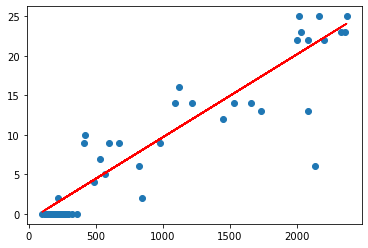

In [54]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()